# Ejercicios Tema 5

In [9]:
%matplotlib inline

try:
    import matplotlib as plt
except ImportError:
    !pip install matplotlib
    import matplotlib

try:
    import numpy as np
except ImportError:
    !pip install numpy
    import numpy as np

try:
    import pylab
except ImportError:
    !pip install pylab
    import pylab

try:
    import sympy as sym
except ImportError:
    !pip install sympy
    import sympy as sym

try:
    import scipy
except ImportError:
    !pip install scipy
    import scipy

from scipy import integrate
from scipy.integrate import odeint


sym.init_printing(use_latex='mathjax')

---

`Ejercicio 5 - para casa`

> *Supongamos un nuevo pesticida que se aplica a los campos y se deposita a través de un río en un lago con un volumen $V$ de agua. Asumimos que el río recibe una cantidad constante de pesticida y que fluye al lago con un ritmo constante $f$. Estamos, por tanto, suponiendo que el río tiene una concentración constante $p$ del nuevo pesticida. Supongamos también que el agua del lago está bien agitada y que entra tanta agua cómo sale de él. Se sabe que si $c(t)$ es la concentración de pesticida en el lago en el tiempo t, entonces el ritmo de cambio en la cantidad de pesticida es igual a la cantidad que entra menos la cantidad que sale. Crea un modelo para saber la cantidad de pesticida en el lago en función del tiempo t.* 

---

### Solución

Del enunciado se obtienen las siguientes conclusiones

- $c(t)$ es la concentración de pesticida en el lago en el tiempo $t$.
- $\frac{dc}{dt}$ es la tasa de cambio de la concentración de pesticida en el tiempo $t$.
- El ritmo de cambio en la cantidad de pesticida es igual a la cantidad que entra menos la cantidad que sale

Por lo que se obtiene $\frac{dc}{dt} = Entrada - Salida$

- El rio recibe una cantidad de pesticida constante $p$ y fluye al lago con un ritmo constante $f$
  
Por lo que la tasa de entrada de pesticida al lago es igual a $Entrada = f * p$.

La tasa de salida de la concentración de pesticida es el flujo de salida del rio (igual al de entrada) multiplicado por la concentración en el instante, por lo que $Salida = f * c(t)$.

La ecuación diferencial queda de la siguiente manera $-\frac{dc}{dt} + f * p - f * c(t) = 0$

A continuación se resuelve la EDO mediante python.

In [10]:
# Variable independiente como simbólica
t = sym.Symbol('t')

# La variable c se define con Function
c = sym.Function('c')

# Constantes: tasa de flujo y concentración de pesticida
f = sym.Symbol('f')
p = sym.Symbol('p')

# Ecuación
edo5 = -c(t).diff(t) + f*p - f*c(t)

# Otra forma
#edo5_2 = f*p - f*c(t)

edo5

               d       
f⋅p - f⋅c(t) - ──(c(t))
               dt      

A continuación se muestra la solución general del modelo.

In [11]:
# Resolución de la ecuación
edo5_sol = sym.dsolve(edo5)
edo5_sol

           -f⋅t    
c(t) = C₁⋅ℯ     + p

---

`Ejercicio 10 - para casa`

> *Considerar la dinámica de un sistema formado por tres partes, A, B y C. Cada una toma un estado, de valor real, cuyo rango está entre $[-1, 1]$. El sistema se comporta de acuerdo con las siguientes transiciones de estado:*

> 1. A adopta el estado actual de B como su próximo estado.

> 2. B adopta el estado actual de C como su próximo estado.

> 3. C adopta el promedio de los estados actuales de A y B como su próximo estado.

> *Crear un modelo de tiempo discreto de este sistema y luego convertirlo en un modelo de tiempo continuo*

---

### Solución

A continuación se crea en python el modelo de tiempo discreto, siguiendo la misma estrategia que la utilizada en los ejercicios del tema anterior.

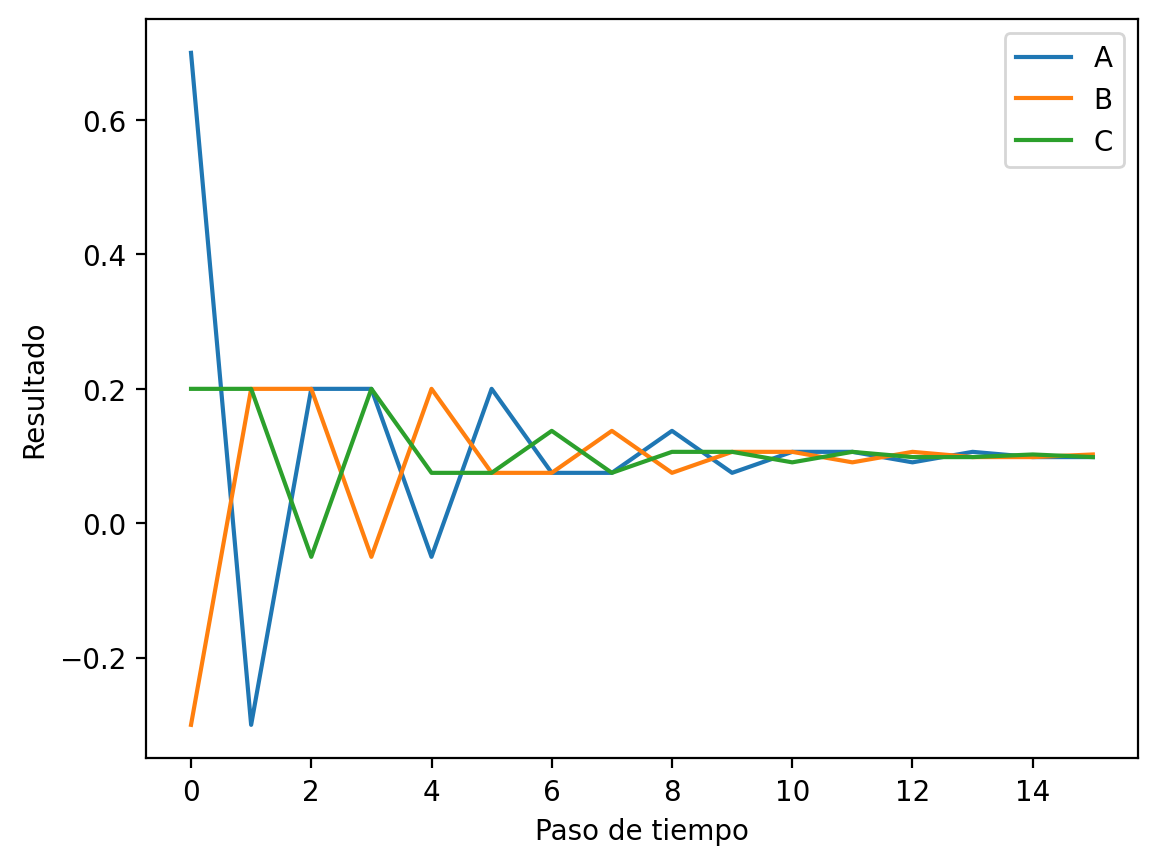

In [12]:
%matplotlib inline

import matplotlib.pyplot as plt

def observacion(estados, result, t, timesteps):
    result.append(estados)
    timesteps.append(t)
    return result, timesteps

def actualizacion(estados, t):
    A, B, C = estados
    A_new = B
    B_new = C
    C_new = (A + B) / 2
    return A_new, B_new, C_new, t + 1

def decoracion(timesteps, result):
    plt.figure(num='Figure 1', dpi=200)
    plt.plot(timesteps, result)
    plt.ylabel('Resultado')
    plt.xlabel('Paso de tiempo')
    plt.legend(['A', 'B', 'C'])

# Iteraciones
iteraciones = 15

# Inicialización de los estados
A = 0.7
B = -0.3
C = 0.2

result = [(A, B, C)]
t = 0
timesteps = [t]

while t < iteraciones:
    A, B, C, t = actualizacion((A, B, C), t)
    result, timesteps = observacion((A, B, C), result, t, timesteps)

decoracion(timesteps, result)
plt.show()

Como se observa, el gráfico presenta picos y cambios bruscos de dirección.

A continuación se transforma el modelo de tiempo discreto creado a un modelo de tiempo continuo.

Para ello el primer paso es de definir el conjunto de ecuaciones diferenciales:

$$\frac{dA}{dt} = B(t) - A(t)$$

$$\frac{dB}{dt} = C(t) - B(t)$$

$$\frac{dC}{dt} = \frac{A(t)+B(t)}{2} - C(t)$$

Una vez obtenidas las ecuaciones, se genera el sistema en python.

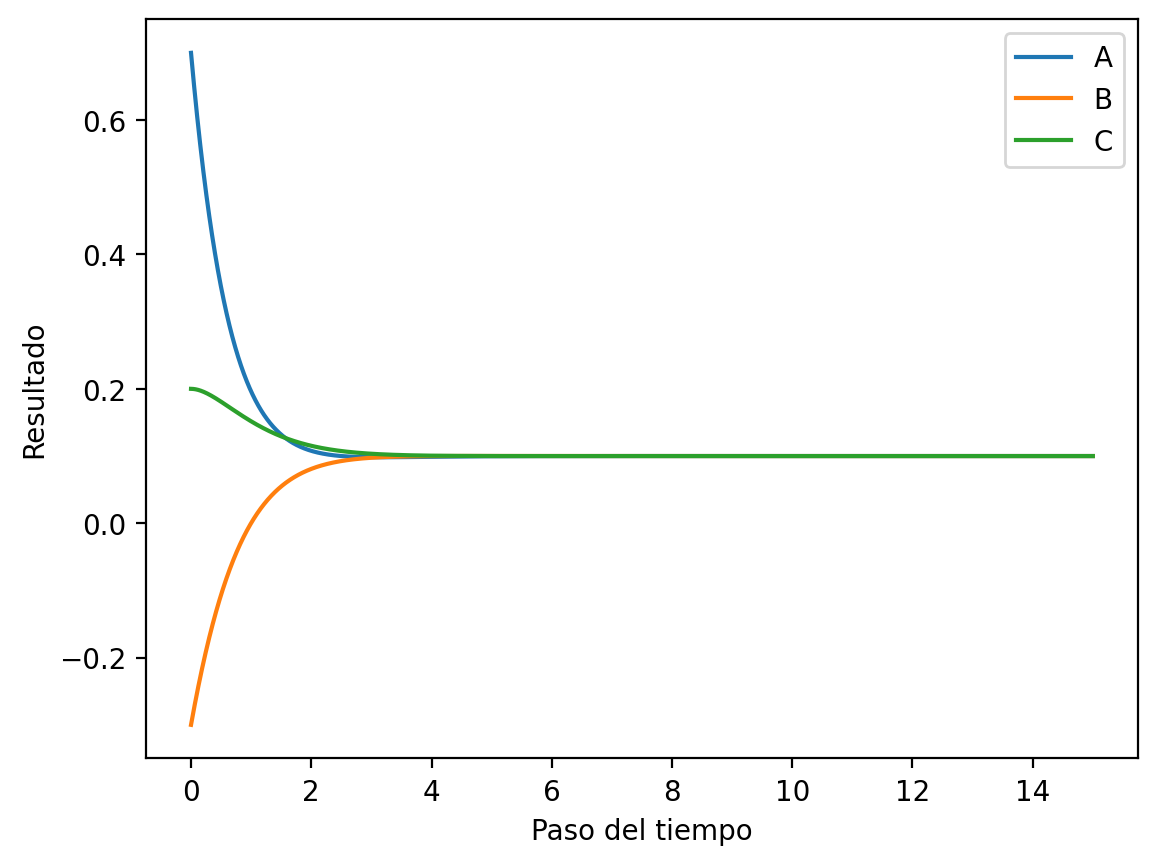

In [13]:
# Inicialización de las funciones
t = sym.symbols('t', positive=True)
A = sym.Function('A')(t)
B = sym.Function('B')(t)
C = sym.Function('C')(t)

# Inicialización de las ecuaciones diferenciales
dA_dt = B - A
dB_dt = C - B
dC_dt = (A + B) / 2 - C

# Convertir las ecuaciones diferenciales a funciones ejecutables
dA_dt_ejec = sym.lambdify((A, B, C, t), dA_dt)
dB_dt_ejec = sym.lambdify((A, B, C, t), dB_dt)
dC_dt_ejec = sym.lambdify((A, B, C, t), dC_dt)

# Definir la función para la ecuación diferencial
def modelo(estados, t):
    A, B, C = estados
    dA_dt = dA_dt_ejec(A, B, C, t)
    dB_dt = dB_dt_ejec(A, B, C, t)
    dC_dt = dC_dt_ejec(A, B, C, t)
    return [dA_dt, dB_dt, dC_dt]

# Condiciones iniciales e iteraciones
cond = [0.7, -0.3, 0.2]
iteraciones = 15
tp = np.linspace(0, iteraciones, num=5000)

# Resolución de las ecuaciones diferenciales
solucion = odeint(modelo, cond, tp)

# Gráfico de los resultados
plt.figure(num='Figure 1', dpi=200)
plt.plot(tp, solucion[:, 0], label='A')
plt.plot(tp, solucion[:, 1], label='B')
plt.plot(tp, solucion[:, 2], label='C')
plt.xlabel('Paso del tiempo')
plt.ylabel('Resultado')
plt.legend()
plt.show()


Como se observa, el gráfico es similar al creado por el modelo de tiempo discreto, ya que convergen en el mismo punto y de la misma manera.

La diferencia es que este gráfico está suavizado, sin picos ni cambios bruscos.

Por lo que este ejercicio ha servido para construir un mismo sistema, en modelos de tiempo discreto y continuo, y para observar las diferencias y similitudes que presentan ambos enfoques.

---

`Ejercicio 14 Para casa`

> *Imagínese dos compuestos químicos, $S$ y $E$, interactuando en un tubo de ensayo. Supongamo que $E$ cataliza la producción de sí mismo usando $S$ como sustrato en la siguiente reacción química*
$$ S + E \rightarrow 2E.$$
*Aplicando la ley de conservación de la masa de Antoine Lavoisier y la ley de acción de masas de Guldberg-Waage, desarrolla un modelo matemático de tiempo continuo que describa los cambios temporales de la concentración de $S$ y $E$ y simule su comportamiento*.

---

### Solución

La ley de conservación de la masa establece que la masa total del sistema no cambia con el tiempo, por lo que $S + E = S(t) + E(t)$.

La ley de acción de masas establece que que la velocidad de esta reacción depende del producto de las concentraciones de S y E.

Por lo que con esa información y el enunciado se obtienen las siguientes ecuaciones diferenciales:

$$\frac{dS}{dt} = -k * S(t) * E(t)$$
$$\frac{dE}{dt} = k * S(t) * E(t)$$

La constante $k$ representa la velocidad de la reacción química.

Una vez claras las ecuaciones diferenciales, se crea el sistema en python.

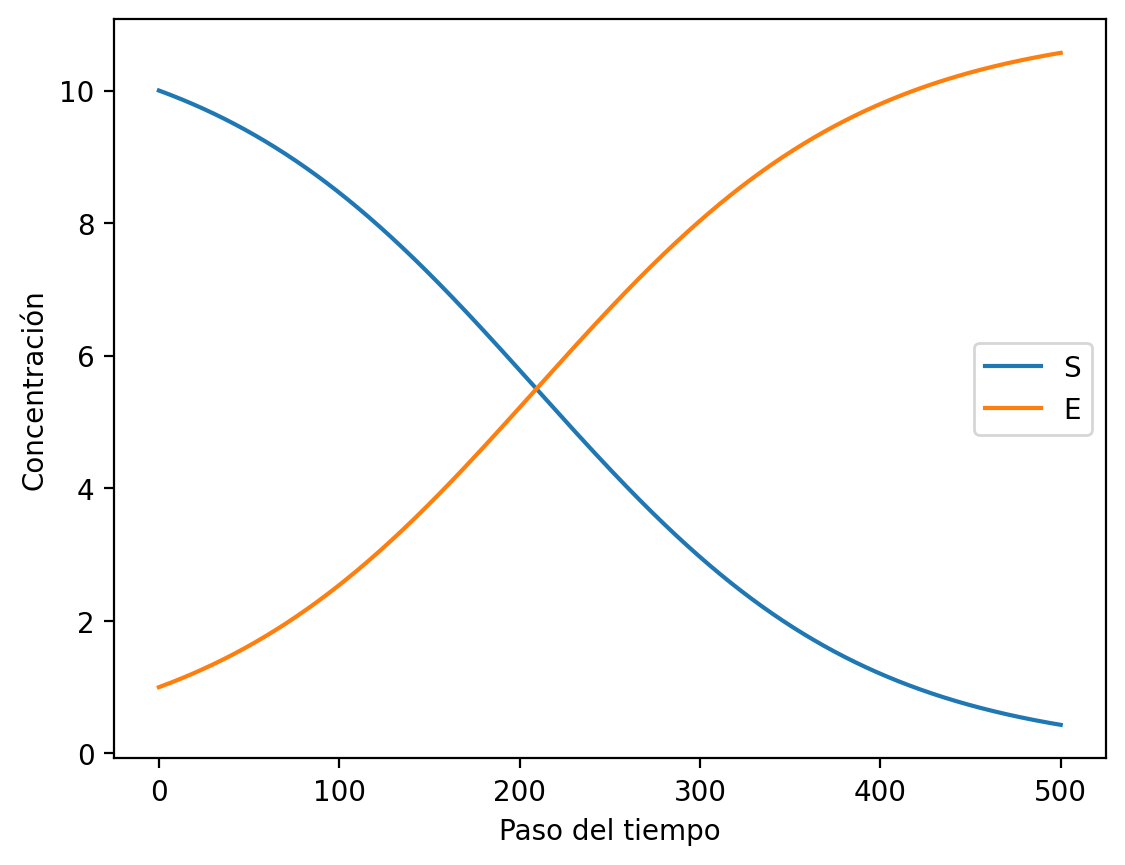

In [14]:
# Inicialización de las funciones
t = sym.symbols('t', positive=True, real=True)
S = sym.Function('S')(t)
E = sym.Function('E')(t)

# Constante de velocidad de la reacción
k = sym.symbols('k', positive=True, real=True)

# Inicialización de las ecuaciones diferenciales
dS_dt = -k * S * E
dE_dt = k * S * E

# Convertir las ecuaciones diferenciales a funciones ejecutables
dS_dt_func = sym.lambdify((S, E, t, k), dS_dt)
dE_dt_func = sym.lambdify((S, E, t, k), dE_dt)

# Definir la función para la ecuación diferencial
def modelo(estados, t, k):
    S, E = estados
    dS_dt = dS_dt_func(S, E, t, k)
    dE_dt = dE_dt_func(S, E, t, k)
    return [dS_dt, dE_dt]

# Condiciones iniciales e iteraciones
cond = [10, 1]  
iteraciones = 500
tp = np.linspace(0, iteraciones, num=5000)

# Resolución de las ecuaciones diferenciales
solucion = odeint(modelo, cond, tp, args=(0.001,))

# Gráfico de los resultados
plt.figure(num='Figure 1', dpi=200)
plt.plot(tp, solucion[:, 0], label='S')
plt.plot(tp, solucion[:, 1], label='E')
plt.xlabel('Paso del tiempo')
plt.ylabel('Concentración')
plt.legend()
plt.show()

Como se observa en el gráfico generado, la masa total de la reacción no varia y la masa de E a lo largo del tiempo es la que crece hasta el total de la masa de la reacción.

---

`Ejercicio 15 Para casa`

> *Cuando se lanza una nueva canción pop, suena atractiva para la gente y su popularidad aumenta. Sin embargo, una vez que la gente se acostumbra a la canción, comienza a parecerles aburrida y su popularidad disminuye. Desarrolla un modelo matemático de tiempo continuo que capture tal subida y bajada en la vida de una canción pop y simule su comportamiento*.

---

### Solución

Para simular la popularidad he creado la siguiente fórmula:

$$Popularidad = \frac{L}{1+e^{-k(t - t_0)}} * e^{-alpha * t}$$

En la que los parámetros son los siguientes:
- L =  Límite superior de la popularidad (100%)
- k = Tasa de crecimiento de la popularidad
- t0 = Tiempo en el que se alcanza la tasa de crecimiento máxima
- alpha = Tasa de disminución de la popularidad

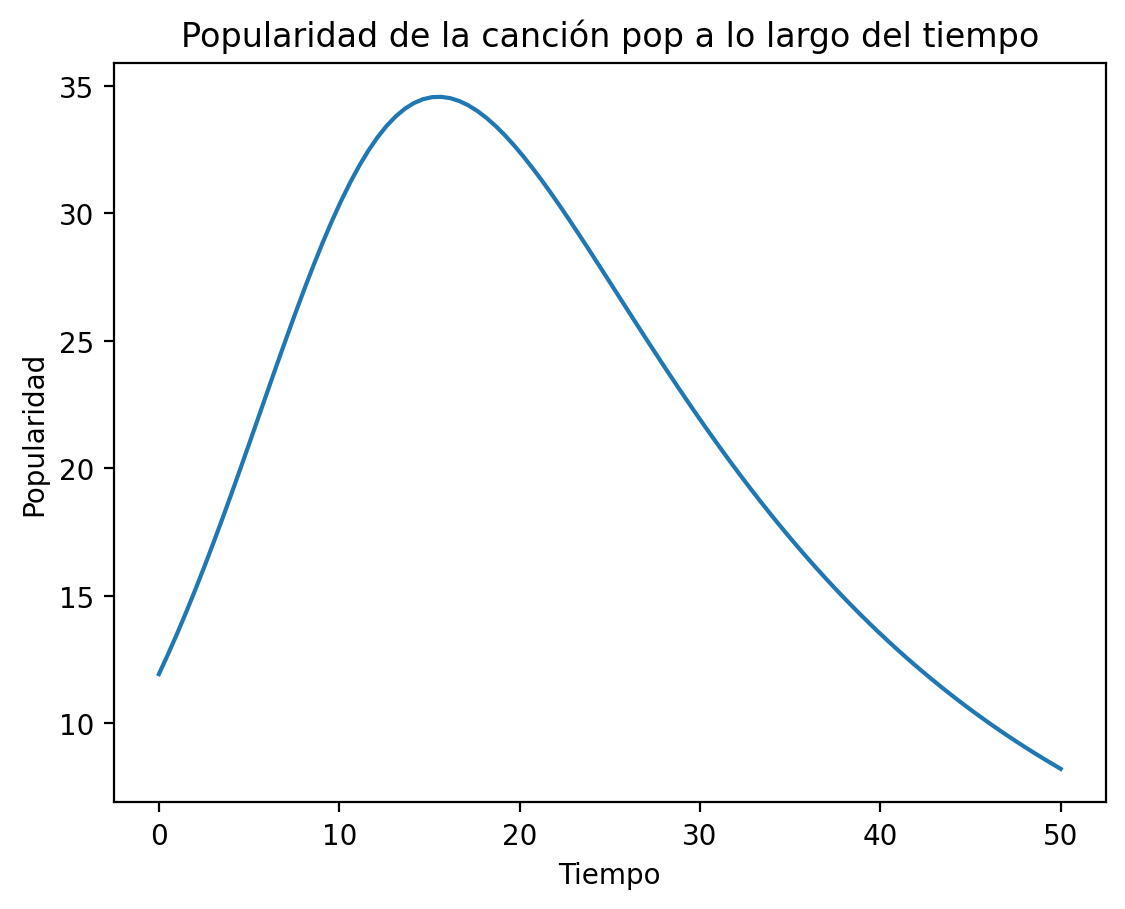

In [15]:
# Función de popularidad de la canción
def popularidad(t, L, k, t0, alpha):
    return L / (1 + np.exp(-k * (t - t0))) * np.exp(-alpha * t)

L = 100  
k = 0.2  
t0 = 10 
alpha = 0.05  

tp = np.linspace(0, 50, 100)
popularidad_cancion = popularidad(tp, L, k, t0, alpha)

# Gráfico de los resultados
plt.figure(num='Figure 1', dpi=200)
plt.plot(tp, popularidad_cancion)
plt.title('Popularidad de la canción pop a lo largo del tiempo')
plt.xlabel('Tiempo')
plt.ylabel('Popularidad')
plt.show()


---

`Ejercicio 16 Para casa`

> *El siguiente modelo se llama modelo Susceptible-Infectado-Recuperado (SIR), un modelo matemático de dinámica epidemiológica. $S$ es el número de individuos susceptibles, $I$ es el número de infectados y $R$ es el número de recuperados. Desarrolla un modelo matemático de tiempo continuo para visualizar la evolución de una epidemia.*

> $$ \frac{dS}{dt} = -aSI$$
> $$ \frac{dI}{dt} = aSI-bI$$
> $$ \frac{dR}{dt} = bI$$

---

### Solución

En este ejercicio obtenemos del enunciado todos los datos y las funciones diferenciales, por lo que en la siguiente porción de código se desarrolla el modelo en python.

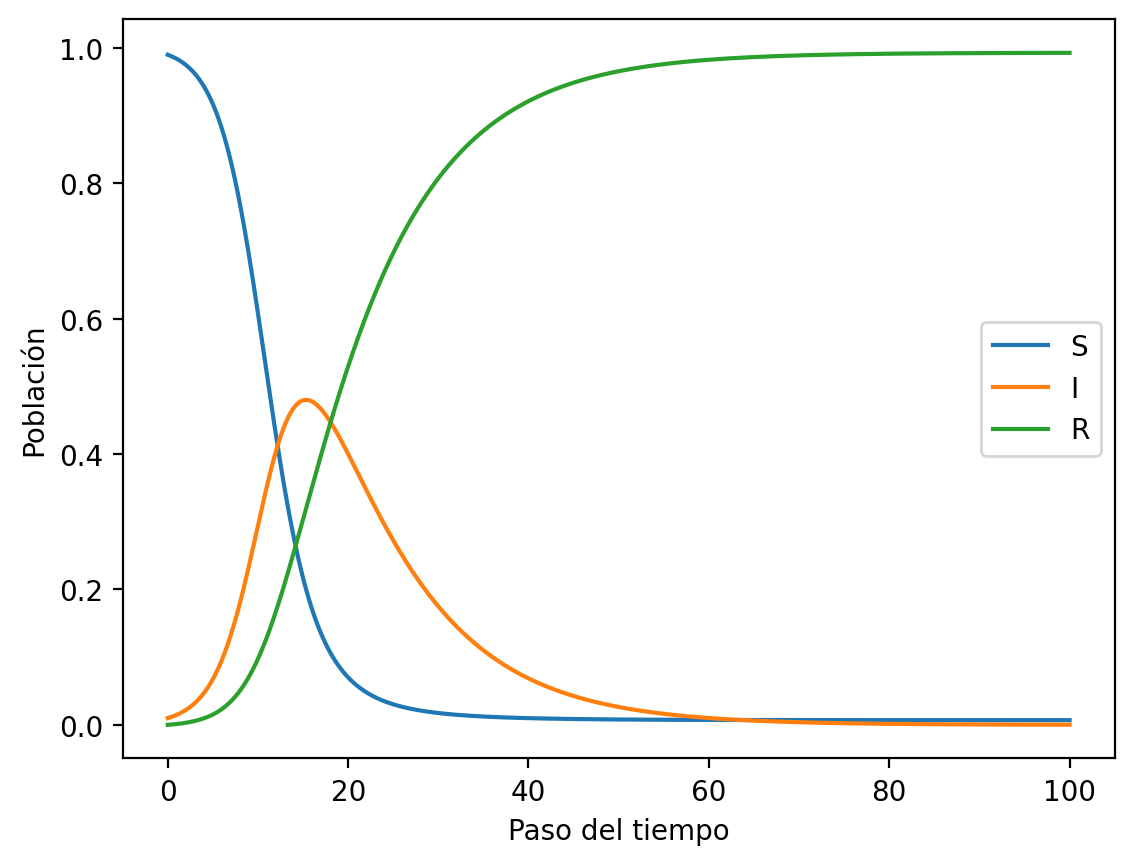

In [16]:
# Inicialización de las funciones
t = sym.symbols('t', positive=True, real=True)
S = sym.Function('S')(t)
I = sym.Function('I')(t)
R = sym.Function('R')(t)

# Constantes de velocidad de la reacción
a, b = sym.symbols('a b', positive=True, real=True)

# Inicialización de las ecuaciones diferenciales
dS_dt = -a * S * I
dI_dt = a * S * I - b * I
dR_dt = b * I

# Convertir las ecuaciones diferenciales a funciones ejecutables
dS_dt_func = sym.lambdify((S, I, t, a, b), dS_dt)
dI_dt_func = sym.lambdify((S, I, t, a, b), dI_dt)
dR_dt_func = sym.lambdify((I, t, a, b), dR_dt)

# Definir la función para la ecuación diferencial
def modelo(estados, t, a, b):
    S, I, R = estados
    dS_dt = dS_dt_func(S, I, t, a, b)
    dI_dt = dI_dt_func(S, I, t, a, b)
    dR_dt = dR_dt_func(I, t, a, b)
    return [dS_dt, dI_dt, dR_dt]

'''
Condiciones iniciales e iteraciones
[población inicial susceptible, infectada, recuperada]
'''
cond = [0.99, 0.01, 0]  
iteraciones = 100
tp = np.linspace(0, iteraciones, num=5000)

solucion = odeint(modelo, cond, tp, args=(0.5, 0.1))

# Gráfico de los resultados
plt.figure(num='Figure 1', dpi=200)
plt.plot(tp, solucion[:, 0], label='S')
plt.plot(tp, solucion[:, 1], label='I')
plt.plot(tp, solucion[:, 2], label='R')
plt.xlabel('Paso del tiempo')
plt.ylabel('Población')
plt.legend()
plt.show()
